In [12]:
from DQbee import *
import sympy as sp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex

$$
x^{\prime}=-x(x-1)(x-2)
$$

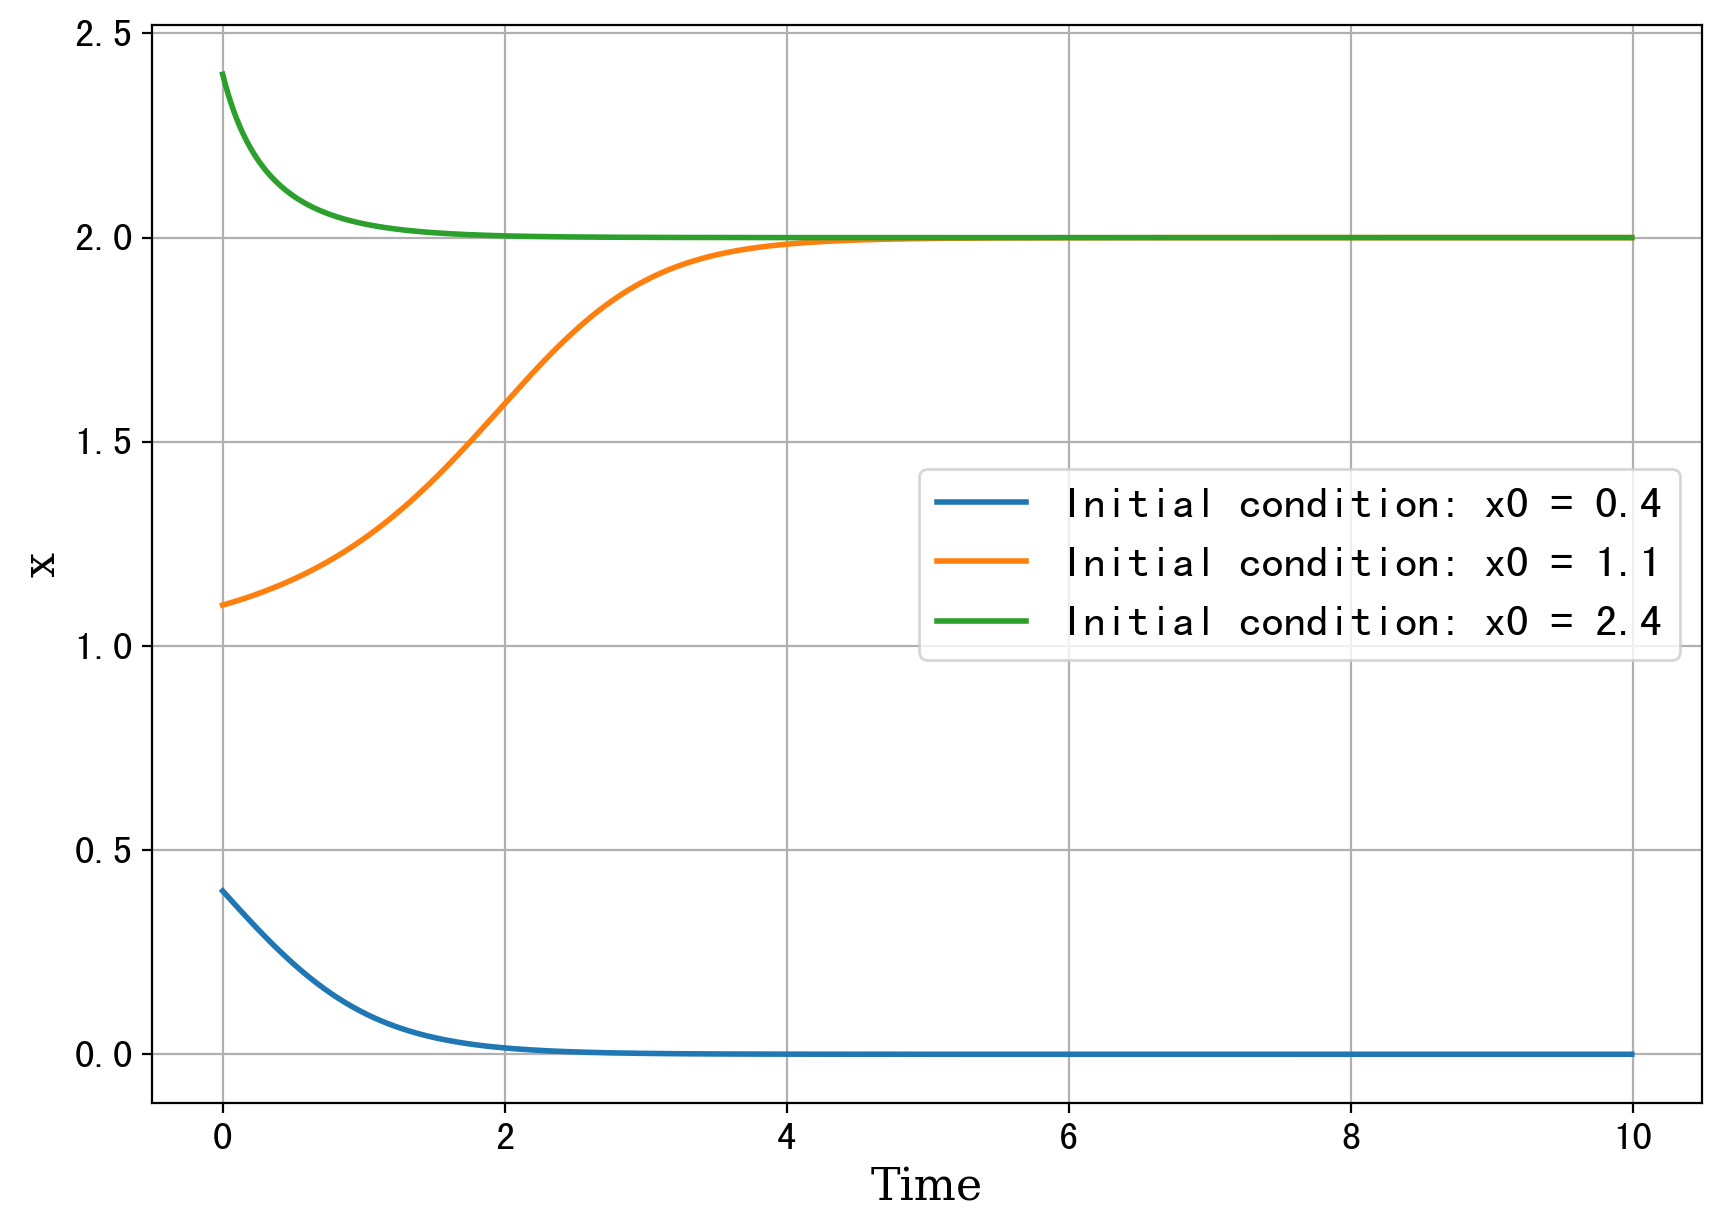

In [13]:
def dxdt(x):
    return -x * (x - 1) * (x - 2)

# Euler 方法
def euler(x0, dt, n):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = x[i-1] + dxdt(x[i-1]) * dt
    return x

# 时间参数
dt = 0.01  # 时间步长
n = 1000  # 步数

# 不同的初始值
initial_conditions = [0.4, 1.1, 2.4]

# 绘图
plt.figure(figsize=(10, 7))

for x0 in initial_conditions:
    t = np.arange(0, n*dt, dt)
    x = euler(x0, dt, n)
    plt.plot(t, x, label=f'Initial condition: x0 = {x0}', lw=2)
plt.xlabel("Time", fontsize=16, fontfamily='serif')
plt.ylabel("x", fontsize=16, fontfamily='serif')
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)  # 显示网格
plt.show()



---

### Plot in "Our Problem?" slide.

In [14]:
x, y, t = sp.symbols('x y t')

system_original = [-x + x ** 3]
system_stable = [-x + x * y, - 2 * y + 2 * y ** 2]
system_unstable = [-x + x * y, 10 * y - 12 * x ** 2 + 2 * y ** 2]

initial_condition = [0.1, 0.01]

<lambdifygenerated-27>:3: RuntimeWarning: overflow encountered in double_scalars
  return [x*y - x, -12*x**2 + 2*y**2 + 10*y]
<lambdifygenerated-27>:3: RuntimeWarning: invalid value encountered in double_scalars
  return [x*y - x, -12*x**2 + 2*y**2 + 10*y]


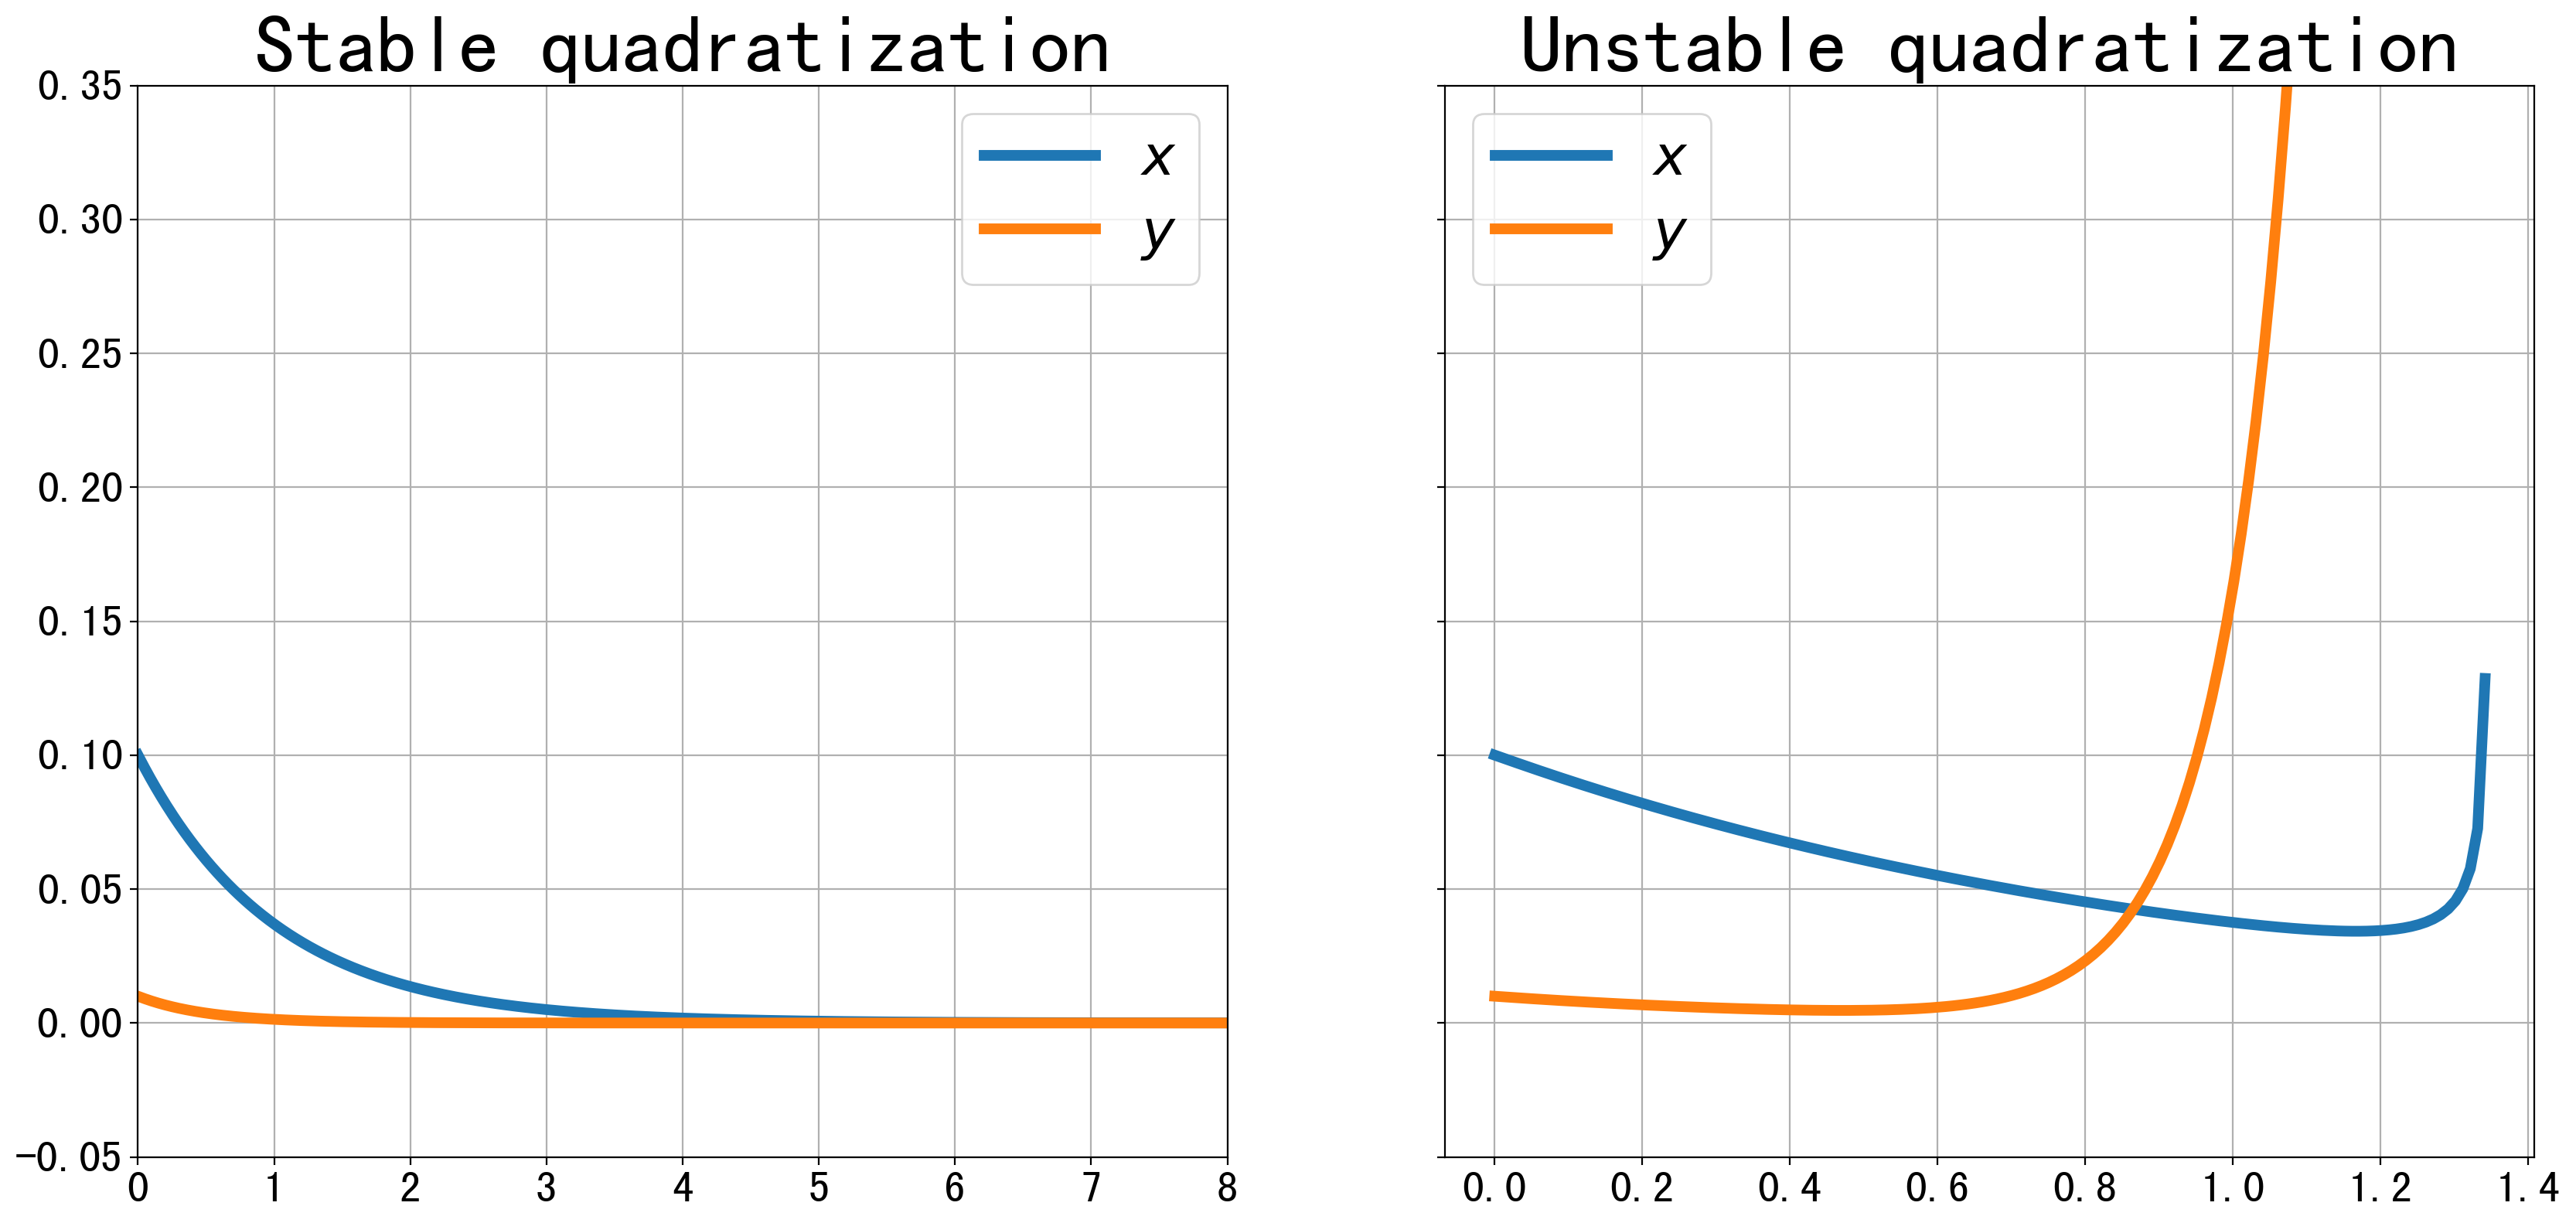

In [19]:
fun_system_original = sp.lambdify((t, [x]), system_original, 'numpy')
fun_system_stable = sp.lambdify((t, [x, y]), system_stable, 'numpy')
fun_system_unstable = sp.lambdify((t, [x, y]), system_unstable, 'numpy')

t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol_original = solve_ivp(fun_system_original, t_span, [0.1], t_eval=t_eval, method='LSODA')
sol_stable = solve_ivp(fun_system_stable, t_span, initial_condition, t_eval=t_eval, method='LSODA')
sol_unstable = solve_ivp(fun_system_unstable, t_span, initial_condition, t_eval=t_eval, method='LSODA')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9), sharey=True)

ax1.plot(sol_stable.t, sol_stable.y[0], label=r'$x$', linewidth=5)
ax1.plot(sol_stable.t, sol_stable.y[1], label=r'$y$', linewidth=5)
ax1.legend(loc='best', prop={'size': 26})
ax1.set_title(r'Stable quadratization', size=38)    
ax1.set_ylim(-0.05, 0.35)
ax1.set_xlim(0, 8)
ax1.grid()

ax2.plot(sol_unstable.t, sol_unstable.y[0], label=r'$x$', linewidth=5)
ax2.plot(sol_unstable.t, sol_unstable.y[1], label=r'$y$', linewidth=5)
ax2.legend(loc='best', prop={'size': 26})
ax2.set_title(r'Unstable quadratization', size=38)
ax2.grid()

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("../../figure/example2_conference.png", dpi=1000, bbox_inches = 'tight')

plt.show()